<a href="https://colab.research.google.com/github/manishramamoorthy/DataScience-Projects/blob/main/Project_2_Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Content of Gold Price Prediction :**
1) Importing Libraries                  
2) Load a DataSet                    
3) Data PreProcessing

    -> 1) Top Five Rows of DataSet 
    -> 2) Last Five Rows of DataSet    
    -> 3) Shape of DataSet          
    -> 4) Data Types             
    -> 5) Information of DataSet                  
    -> 6) Checking Missing Values of DataSet   
    -> 7) Droping Duplicates Values of Dataset         
4) EDA (Exploratory Data Analysis) 
           
    -> 1) Statistical Measures     
    -> 2) Correlation           
    -> 3) visualization of Correlation          
    -> 4) Checking the Distribution of the GOLD Price                       
5) Train and Test Split                   
6) Feature Scaling                                        
7) Build a Model                     
8) Making Prediction                    
9) Compare Actual and Predicted Scores                
10) Evaluation Metrics     
11) Feature Importances                 

**Summary of Gold Price Prediction :**      
Gold Price Prediction is a Supervised Learning. The Vision of Gold Price Prediction is from Analysis a Feature to Predict Current Gold Rate.

**Variable Description:**            
1) Date — mm/dd/yyyy        
2) SPX — is a free-float weighted measurement stock market index of the 500 largest companies listed on stock exchanges in the United States.          
3) GLD — Gold Price     
4) USO — United States Oil Fund          
5) SLV — Silver Price            
6) EUR/USD — currency pair quotation of the Euro against the US          


## **1) Importing Libraries**

In [4]:
import pandas as pd
import numpy as np 

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# **2) Load a DataSet**

In [5]:
gold_data = pd.read_csv("/content/gld_price_data.csv")

# **3) Data PreProcessing**

**1) Top Five Rows of DataSet**

In [6]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


**2) Last Five Rows of DataSet**

In [7]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


**3) Shape of DataSet**

In [8]:
gold_data.shape
print("Number of Rows: ",gold_data.shape[0])
print("Number of Columns: ",gold_data.shape[1])

Number of Rows:  2290
Number of Columns:  6


**4) Data Types**

In [9]:
gold_data.dtypes

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

**5) Information of DataSet**

In [10]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


**6) Checking Missing Values of DataSet**

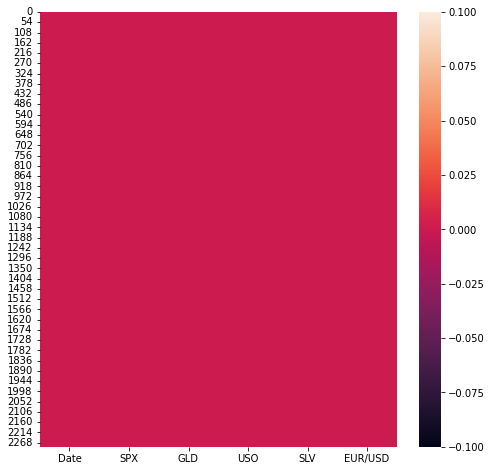

In [11]:
plt.figure(figsize = (8,8))
sns.heatmap(gold_data.isnull())

In [12]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

**7) Droping Duplicates Values of Dataset**

In [13]:
gold_data = gold_data.drop_duplicates()

**4) EDA (Exploratory Data Analysis)**

**1) Statistical Measures**

In [14]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


**2) Correlation**

In [15]:
correlation = gold_data.corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


**3) visualization of Correlation**

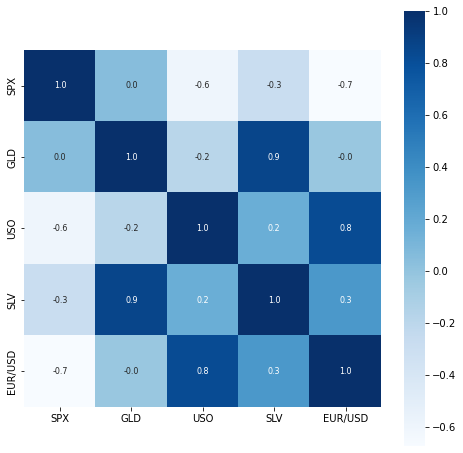

In [16]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

**4) Checking the Distribution of the GOLD Price**

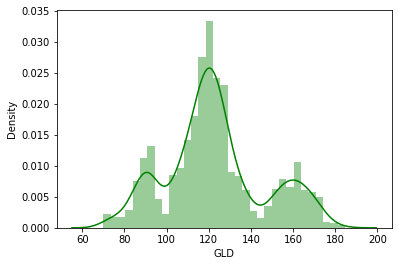

In [17]:
sns.distplot(gold_data['GLD'],color='green')

In [18]:
import plotly.express as px
plt.figure(figsize=(7, 12))
px.histogram(gold_data, x='GLD')

<Figure size 504x864 with 0 Axes>

# **5) Train and Test Split**

In [19]:
X = gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=7)

## **6) Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 0.55120003, -1.12470636, -0.91100381, -1.42834991],
       [ 0.85820907, -0.85231429, -0.86032652, -1.45403107],
       [-0.86244496,  0.21953336,  1.11186469,  0.1639198 ],
       ...,
       [-0.53187188,  3.39811599, -0.48151361,  2.09890824],
       [ 0.46734974,  0.2392792 , -0.18040602,  0.70962355],
       [ 1.76805942, -1.06293716, -0.58441681, -0.92216496]])

# **Build a Model :**

**Random Forest Regressor:**

In [24]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=100,max_depth=15,max_features="sqrt")
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt')

In [23]:
from sklearn.model_selection import cross_val_score

for depth in range(1,16):
  RF = RandomForestRegressor(max_depth=depth)
  RF.fit(X_train, y_train) 
  trainAccuracy = metrics.r2_score(y_train, RF.predict(X_train)) 
  RF = RandomForestRegressor(max_depth=depth) 
  valAccuracy = cross_val_score(RF, X_train, y_train, cv=10) 
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.6550443838066711  Cross val score :  0.6470009152599616
Depth  :  2  Training Accuracy :  0.8209464903121282  Cross val score :  0.8154841179786827
Depth  :  3  Training Accuracy :  0.906577803005108  Cross val score :  0.8951574932230428
Depth  :  4  Training Accuracy :  0.9601752594582105  Cross val score :  0.9522466365278426
Depth  :  5  Training Accuracy :  0.9765836100364769  Cross val score :  0.9693640926032032
Depth  :  6  Training Accuracy :  0.9898221806826434  Cross val score :  0.9816854611347174
Depth  :  7  Training Accuracy :  0.9943546321147387  Cross val score :  0.985537654346834
Depth  :  8  Training Accuracy :  0.9966123051923644  Cross val score :  0.9874849845746445
Depth  :  9  Training Accuracy :  0.9975355362808239  Cross val score :  0.9884875510811046
Depth  :  10  Training Accuracy :  0.9980365611361184  Cross val score :  0.98850987563634
Depth  :  11  Training Accuracy :  0.9982334100826978  Cross val score :  0.9890782

# **8) Making Prediction**

In [25]:
RF.predict([[1447.160034,77.309998,15.180,1.557099]])

array([85.9176995])

# **9) Compare Actual and Predicted Scores**

In [26]:
y_pred = RF.predict(X_test)
y_pred

array([106.64150084, 104.69186596, 146.59850094, 116.86613344,
       155.16760107, 126.82476806, 146.25865766, 146.4010328 ,
       122.06467683, 121.65066237, 118.91510018, 133.13231802,
        85.47639934,  92.6025294 , 119.84254535, 160.65929793,
       118.64506815, 115.52845157, 125.38084795, 107.09881944,
       161.61463902, 122.67089918, 161.5728183 , 123.44413804,
       120.45843027, 168.76001858, 139.55279033, 119.95308873,
        92.58099984, 121.77321879,  93.81200156, 160.45841872,
       113.63687278, 151.8925016 ,  97.23291279, 156.60938869,
       117.8565437 , 105.36527561, 121.09150042, 143.1378986 ,
       159.43528914,  80.5790011 , 114.98179037, 102.352371  ,
        90.64583969, 176.82320065, 125.43686512,  89.72975147,
       107.77560827, 128.32569191, 126.51728782, 128.51628516,
        89.75649956, 120.34182472, 140.09599029, 152.61143258,
       123.72568432, 126.67642084, 125.5732412 ,  95.38949955,
       119.78837291, 124.79901932, 124.24976458, 108.79

In [27]:
df = pd.DataFrame({"Actual": y_test,"Prediction" :y_pred})
df

,Actual,Prediction
1782,106.949997,106.641501
1673,103.930000,104.691866
868,154.869995,146.598501
2035,116.730003,116.866133
961,154.770004,155.167601
...,...,...
1909,124.779999,125.322126
858,167.320007,159.651083
95,86.650002,87.832449
1401,124.940002,124.239872


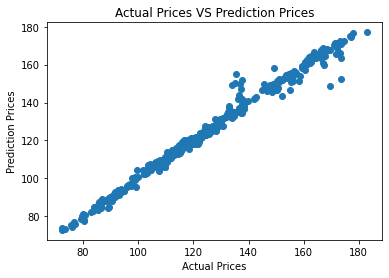

In [28]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Prediction Prices")
plt.title("Actual Prices VS Prediction Prices")
plt.show()

# **10) Evaluation Metrics**

In [29]:
from sklearn import metrics
print("R2-Scores: ",metrics.r2_score(y_test,y_pred))

R2-Scores:  0.9867282454214267


# **11) Feature Importances**

In [30]:
# Get numerical feature importances
importances = list(RF.feature_importances_)
# list of tuple with variable and importances
feature_importances = [(feature,round(importance,2)) for feature,importance in zip(X,importances)]
# Sort the feature and importances
feature_importances = sorted(feature_importances, key= lambda X:X[1],reverse = True)
# Print out the Feature of importances
[print("variable: {:20} Importance :{}".format(*pair)) for pair in feature_importances]

variable: SLV                  Importance :0.62
variable: SPX                  Importance :0.2
variable: USO                  Importance :0.11
variable: EUR/USD              Importance :0.06


[None, None, None, None]